# Run Data Generation

This notebook runs `gen_data_script.py` to generate quantum dot (QD) data. Each datapoint includes:
- **PNG files** for each gate-pair cut (charge stability diagrams)
- **data.npz** with arrays: `C_tilde_DD`, `C_DG`, `geometry`, `tc_meV`, `v_offset`, `x_voltage`, `y_voltage`, `alpha`, `E_c`, `cuts`

Configuration is loaded from `config_data_gen.json` by default. You can override the config path, output directory, and number of datapoints below.


In [1]:
import os
from pathlib import Path

# Run from project root (where config_data_gen.json and gen_data_script live)
PROJECT_ROOT = Path.cwd()
if not (PROJECT_ROOT / "config_data_gen.json").exists():
    # If started elsewhere, try the notebook's directory
    PROJECT_ROOT = Path(__file__).resolve().parent if "__file__" in dir() else PROJECT_ROOT
os.chdir(PROJECT_ROOT)
print(f"Working directory: {PROJECT_ROOT}")


Working directory: /Users/krzywdaja/Documents/new_repositories/learning-QDs-parameters


In [2]:
# Parameters (override these to customize)
config_path = "config_data_gen.json"
output_dir = "generated_data"
num_datapoints = 2  # reduce for a quick test, e.g. 5


In [ ]:
from gen_data_script import load_config, generate_datapoint

config = load_config(config_path)
os.makedirs(output_dir, exist_ok=True)

print(f"Generating {num_datapoints} datapoints → {output_dir}/")
successful, failed = 0, 0
for i in range(num_datapoints):
    ok = generate_datapoint(config, i, output_dir)
    if ok:
        successful += 1
    else:
        failed += 1
print(f"\nDone. Successful: {successful}, Failed: {failed}")


Generating 2 datapoints → generated_data/
[[[ -3.47147923 -12.07297782]
  [ 77.41356262  -7.18197501]
  [ -0.46907933  73.04660489]
  [ 76.04286672  74.86136351]
  [  5.17699301 145.98980594]
  [ 76.48800781 143.50887633]
  [  0.15053142 -76.69658813]]]
EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[23.64238252  2.24553275  3.87451666  2.11586996  1.23763831  1.53410862
   2.5298126 ]
 [ 2.24553275 21.58121909  1.9722447   3.9151015   2.76564441  1.27406559
   0.53634066]
 [ 3.87451666  1.9722447  20.6939263   4.08933908  3.61003917  3.56763443
   0.33524929]
 [ 2.11586996  3.9151015   4.08933908 22.99880848  2.24376854  3.13956537
   0.1991008 ]
 [ 1.23763831  2.76564441  3.61003917  2.24376854 13.76745133  2.83543917
   0.0715228 ]
 [ 1.53410862  1.27406559  3.56763443  3.13956537  2.83543917 21.4097135
   0.03540259]
 [ 2.5298126   0.53634066  0.3352492

Rastering CSD: 100%|██████████| 22500/22500 [00:01<00:00, 21115.03it/s]


Generated datapoint 00000 with 15 cuts
[[[ -0.61772878   2.0444416 ]
  [ 84.98352613  -2.21524165]
  [ -4.70876909  75.58694113]
  [ 79.08700936  69.63936894]
  [  4.1829637  156.58996061]
  [ 77.3331834  142.59704269]
  [ -3.70951555 -62.97453246]]]
EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[35.45451264  3.63045962  3.49592808  1.70832234  1.85777269  1.67137116
   2.90286986]
 [ 3.63045962 19.99314733  1.99031188  2.62525006  1.57610559  2.42225756
   0.76480149]
 [ 3.49592808  1.99031188 28.47167248  1.89700555  4.3474131   2.986278
   0.26095173]
 [ 1.70832234  2.62525006  1.89700555 22.3425834   2.7737897   4.43192915
   0.26146586]
 [ 1.85777269  1.57610559  4.3474131   2.7737897  20.16801112  2.43887658
   0.07206576]
 [ 1.67137116  2.42225756  2.986278    4.43192915  2.43887658 23.45853122
   0.08651004]
 [ 2.90286986  0.76480149  0.26095173  0

Rastering CSD: 100%|██████████| 22500/22500 [00:01<00:00, 20439.92it/s]


In [14]:
import numpy as np
np.random.normal(0, 0.1)

-0.1743591117759693

### Verify output

Load one datapoint and show the structure of `data.npz` and a sample cut image.


data.npz keys and shapes:
  C_DG: (1, 4, 4)
  C_tilde_DD: (1, 4, 4)
  E_c: (1, 4, 4)
  alpha: (1, 4, 4)
  cuts: (1, 3, 2, 4)
  geometry: (1, 4, 2)
  tc_meV: (1, 4, 4)
  v_offset: (1, 4)
  x_voltage: (1, 3, 3)
  y_voltage: (1, 3, 3)


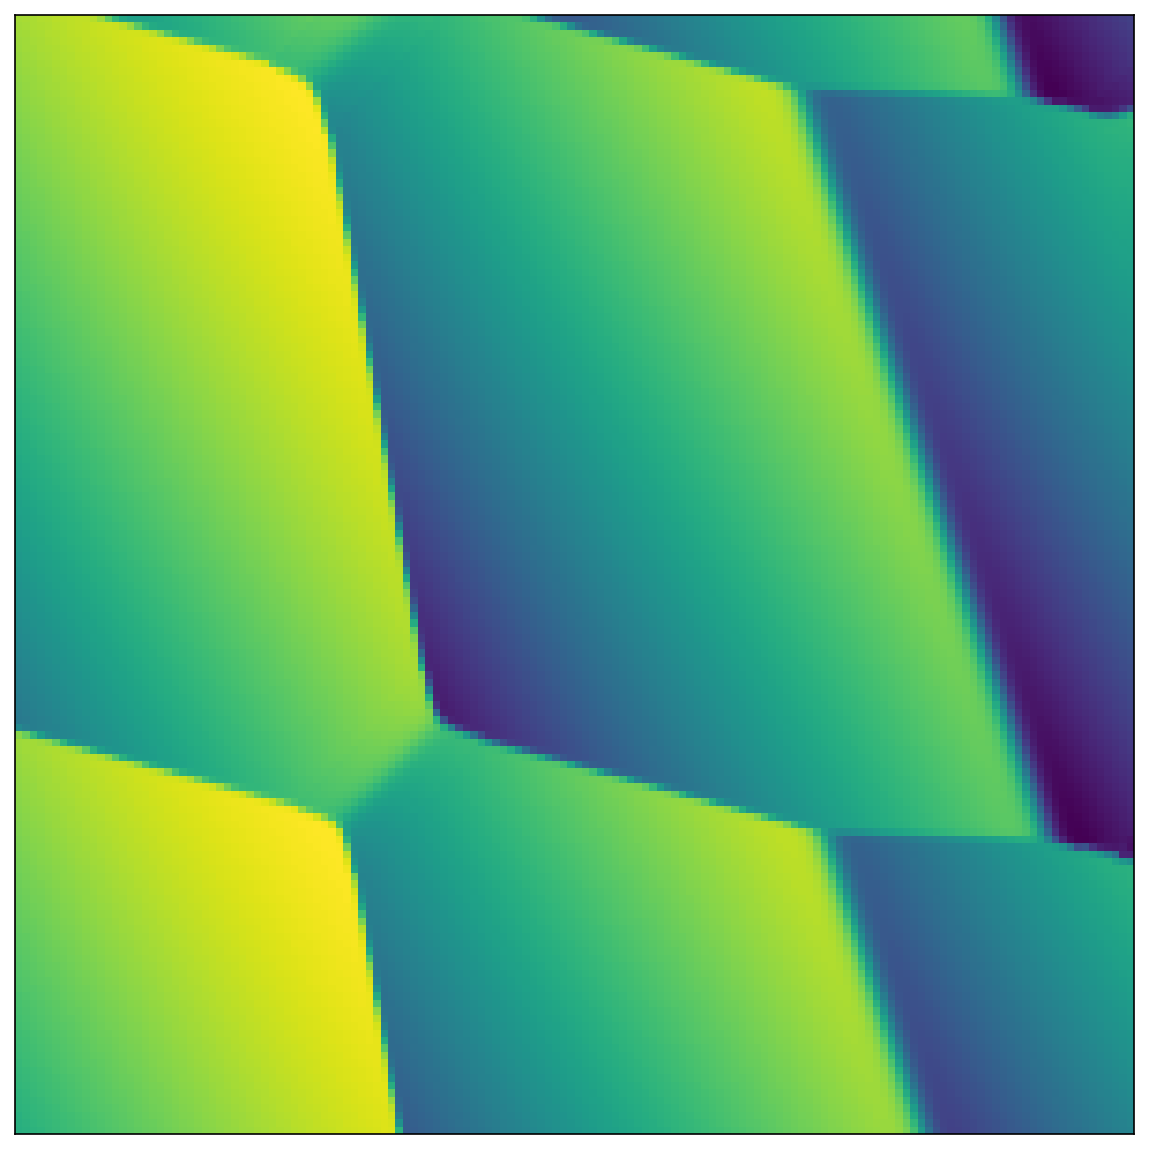

In [17]:
import numpy as np
from pathlib import Path

dp_dir = Path(output_dir) / "datapoint_00000"
if not dp_dir.exists():
    dp_dir = next(Path(output_dir).glob("datapoint_*"), None)
if dp_dir is None:
    print("No datapoint folder found.")
else:
    data = np.load(dp_dir / "data.npz")
    print("data.npz keys and shapes:")
    for k in sorted(data.keys()):
        print(f"  {k}: {data[k].shape}")
    # Show first cut image
    cut0 = dp_dir / "cut_0.png"
    if cut0.exists():
        from IPython.display import Image, display
        display(Image(filename=str(cut0)))
